plot bar of FoM for timegaps and footprint

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
plt.style.use('seaborn')
plt.rc('legend', fontsize=20) # using a size in points


In [3]:
cols_all = ['uu', 'ug', 'ur', 'ui', 'uz', 'uy', 'gg', 'gr', 'gi', 'gz', 'gy', 'rr', 'ri', 'rz', 'ry', 'ii', 'iz', 'iy', 'zz', 'zy', 'yy']

cols_same = [ 'uu',  'gg',  'rr',  'ii',  'zz',  'yy']

cols_diff = ['ug', 'ur', 'ui', 'uz', 'uy', 'gr', 'gi', 'gz', 'gy', 'ri', 'rz', 'ry', 'iz', 'iy', 'zy']


In [4]:
def scale(arr):
    newarr = arr / arr.max()
    return newarr
    

### timegaps

In [69]:
df_fom = pd.read_csv('df_tgaps_raw_sat.csv')

In [73]:
# scale fom table to 0 and 1
df_new = df_fom[ ['db'] ].copy()
for col in cols_all:
    # df_new[ col ] = np.tanh ( scale ( df_fom[col] ) * 3 )
    df_new[col] = scale(df_fom[col]) 
    
df_new['db'] = df_new['db'].apply(lambda x: x.replace("_v1.4_10yrs.db", "") )
df_new['db'] = df_new['db'].apply(lambda x: x.replace("v1.4_10yrs.db", "") )


In [7]:
# df_new.to_csv('df_tgaps_sat.csv', index=False)

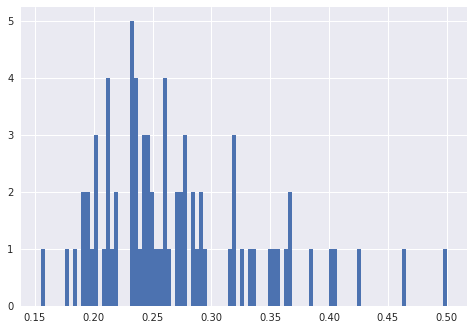

In [176]:
# plt.hist(df_new['different filters'], bins=100);

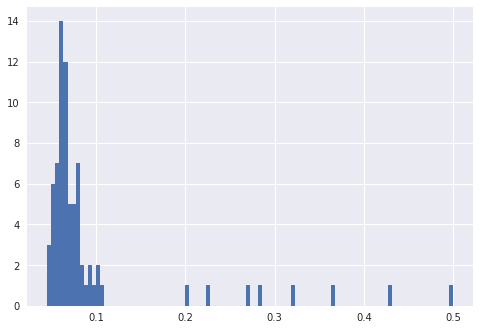

In [177]:
# plt.hist(df_new['same filter'], bins=100);

In [198]:
#df_['total_logn'] = np.sort( scale( np.random.lognormal(mean=0, sigma=0.5, size=76) )/2 )


#dist_1 = np.sort( scale( np.random.lognormal(mean=0, sigma=0.5, size=76) )/2 )


#dist_2 = np.sort( scale( np.random.lognormal(mean=0, sigma=0.5, size=76) )/2 )


```
# assume score from a log normal distribution

df_new['same filter'] = scale( np.sum(df_new[ cols_same ], axis=1) ) /2
df_new['different filters'] = scale( np.sum(df_new[ cols_diff ], axis=1) )/2

df_ = df_new.set_index('db')

dist_1 = np.sort( scale( np.random.lognormal(mean=0, sigma=0.5, size=76) )/2 )
dist_2 = np.sort( scale( np.random.lognormal(mean=0, sigma=0.5, size=76) )/2 )

df_ = df_.sort_values(by='different filters', ascending=True)
df_['different filters'] = dist_1

df_ = df_.sort_values(by='same filter', ascending=True)
df_['same filter'] = dist_2

df_['total'] = np.sum(df_[['same filter', 'different filters'] ], axis=1)

df_ = df_.sort_values(by='total', ascending=True)
df_[ ['same filter','different filters'] ].plot.barh(stacked=True, figsize=(8, 30))

plt.xlabel('normalized score for discovery of unknown unknowns')
plt.ylabel('')
plt.xlim([0, 1.025])
```

Text(0, 0.5, '')

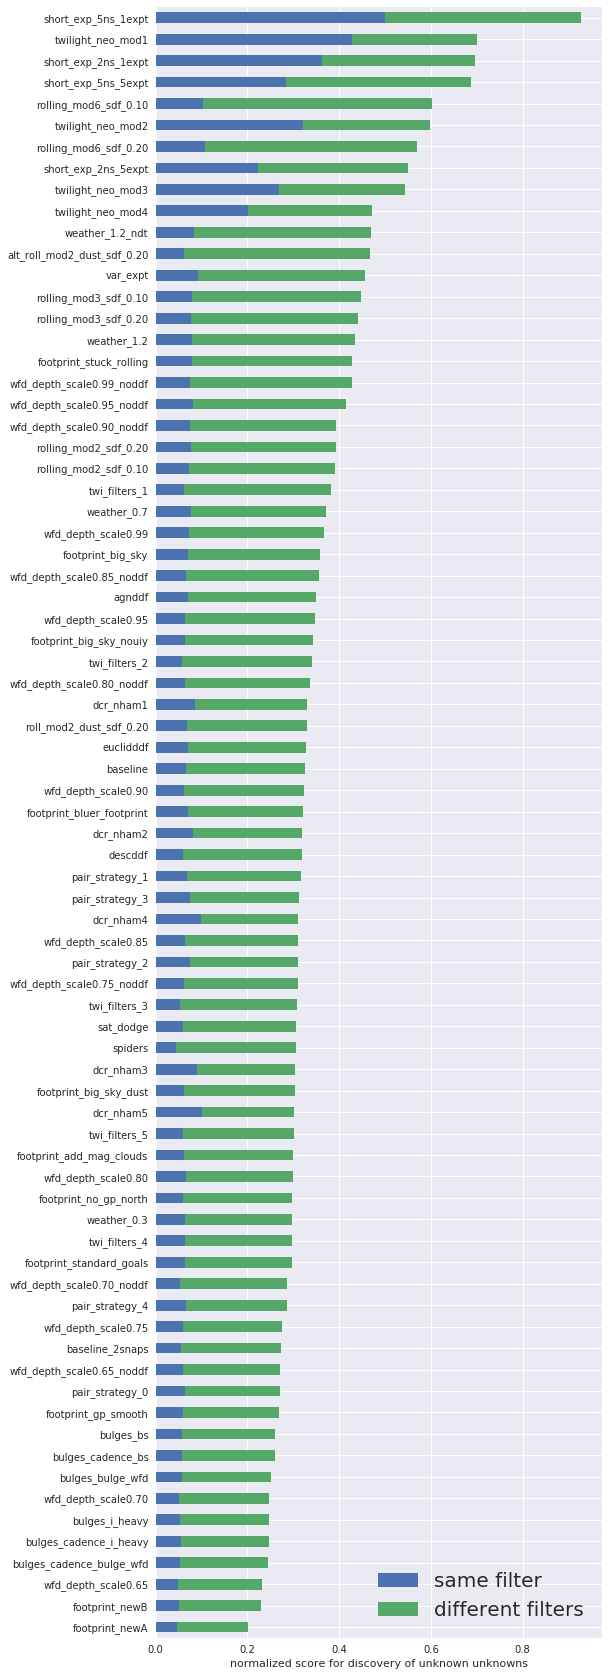

In [14]:
df_new['same filter'] = scale( np.sum(df_new[ cols_same ], axis=1) ) /2
df_new['different filters'] = scale( np.sum(df_new[ cols_diff ], axis=1) )/2
df_new['total'] = np.sum(df_new[['same filter', 'different filters'] ], axis=1)

df_new['db'] = df_new['db'].apply(lambda x: x.replace("_v1.4_10yrs.db", "") )
df_new['db'] = df_new['db'].apply(lambda x: x.replace("v1.4_10yrs.db", "") )

df_ = df_new.sort_values(by='total', ascending=True).set_index('db')

df_[ ['same filter','different filters'] ].plot.barh(stacked=True, figsize=(8, 30))

plt.xlabel('normalized score for discovery of unknown unknowns')
plt.ylabel('')

(0, 1.01)

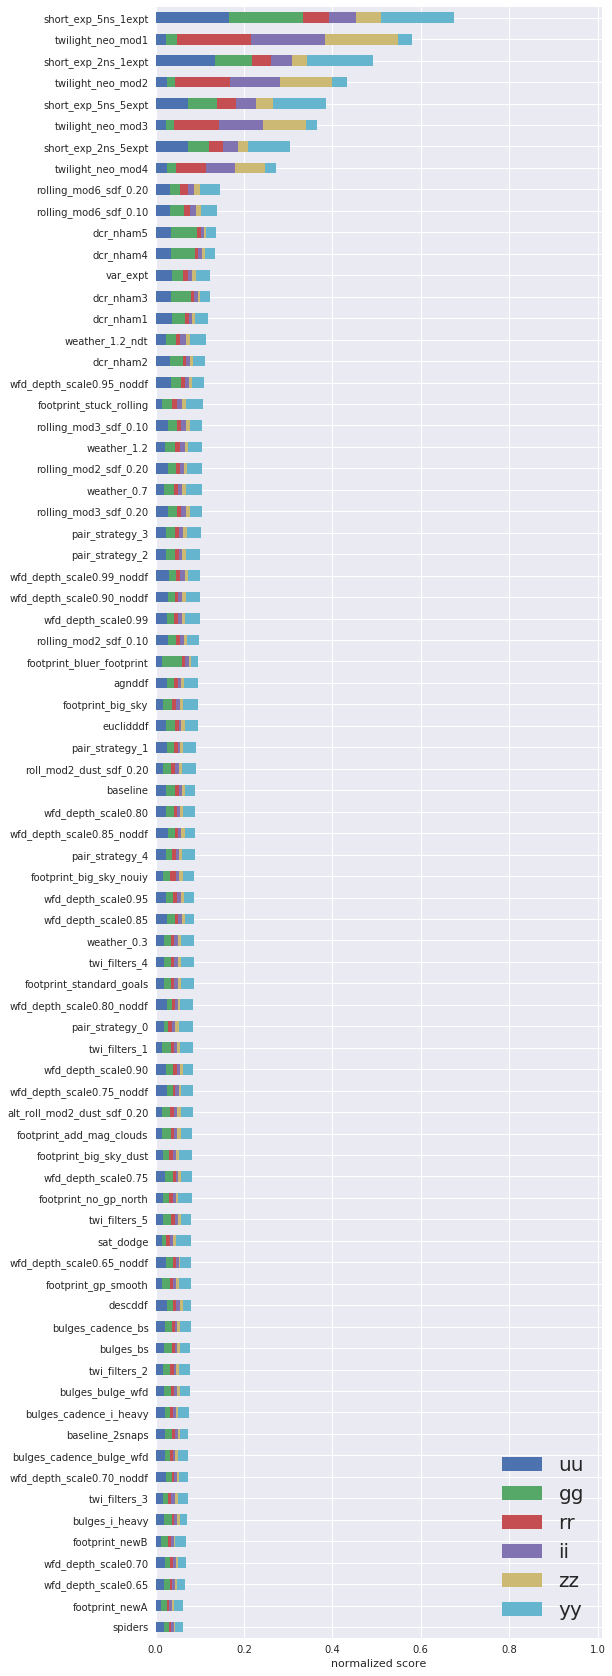

In [74]:
# tgaps FOM for same filter pair
df_ = df_new.set_index('db')

colon = cols_same
df_['total'] = np.sum(df_[ colon ], axis=1)

df_ = df_.sort_values(by='total', ascending=True)
df_[colon] = df_[colon]/6
df_[ colon ].plot.barh(stacked=True, figsize=(8, 30))
plt.xlabel('normalized score')
plt.ylabel('')
plt.legend(loc='lower right')
plt.xlim([0,1.01])

(0, 1.01)

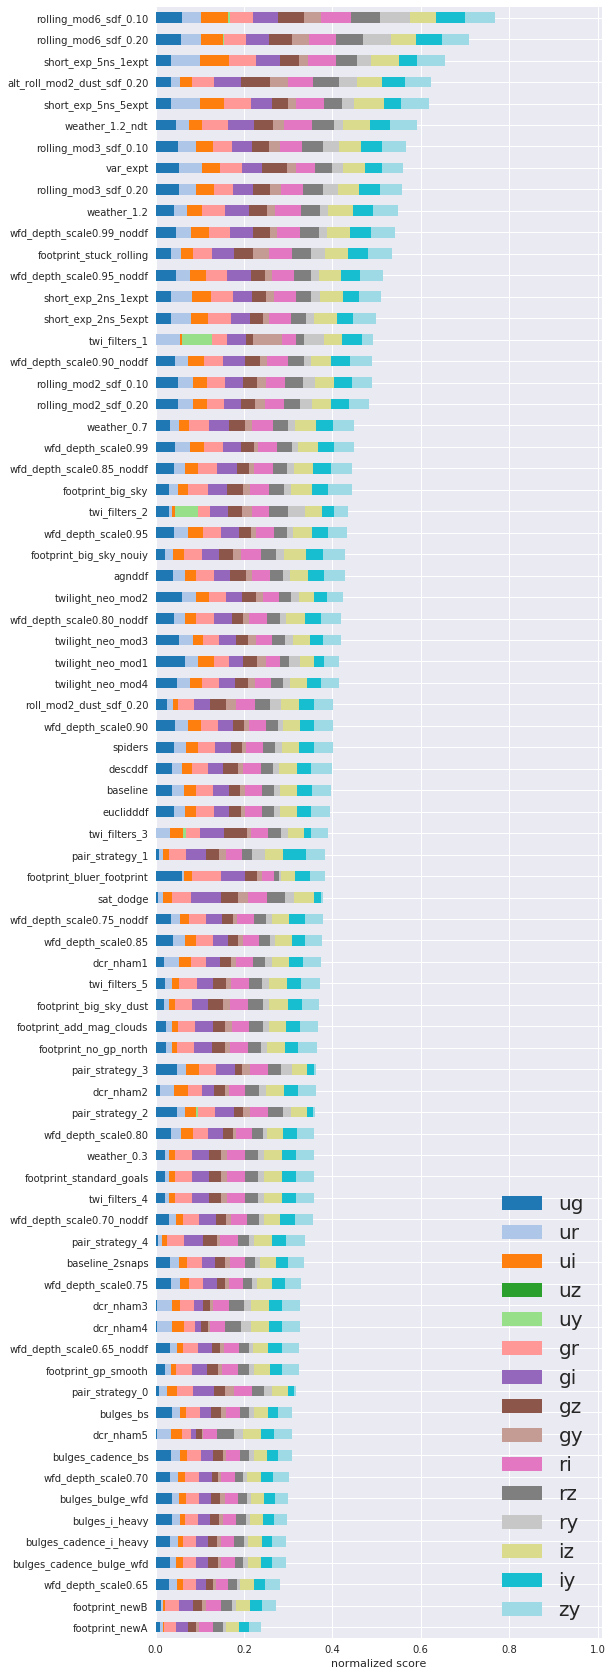

In [76]:
# tgaps FOM for differnt filters
df_ = df_new.set_index('db')

colon = cols_diff
df_['total'] = np.sum(df_[ colon ], axis=1)

df_ = df_.sort_values(by='total', ascending=True)
df_[ colon ] = df_[ colon ]/15
df_[ colon ].plot.barh(stacked=True, figsize=(8, 30), colormap=plt.cm.tab20)
plt.xlabel('normalized score')
plt.ylabel('')
plt.legend(loc='lower right')
plt.xlim([0,1.01])

### footprint

In [77]:
df_stars = pd.read_csv('df_stars_sat.csv')

In [78]:
df_new = df_stars.copy()
df_new['db'] = df_new['db'].apply(lambda x: x.replace("_v1.4_10yrs.db", "") )
df_new['db'] = df_new['db'].apply(lambda x: x.replace("v1.4_10yrs.db", "") )
df_new = df_new.set_index('db')

for col in df_new.columns:
    # df_new[ col ] = np.tanh ( scale ( df_fom[col] ) * 3 )
    df_new[col] = scale(df_new[col]) 


(0, 1.01)

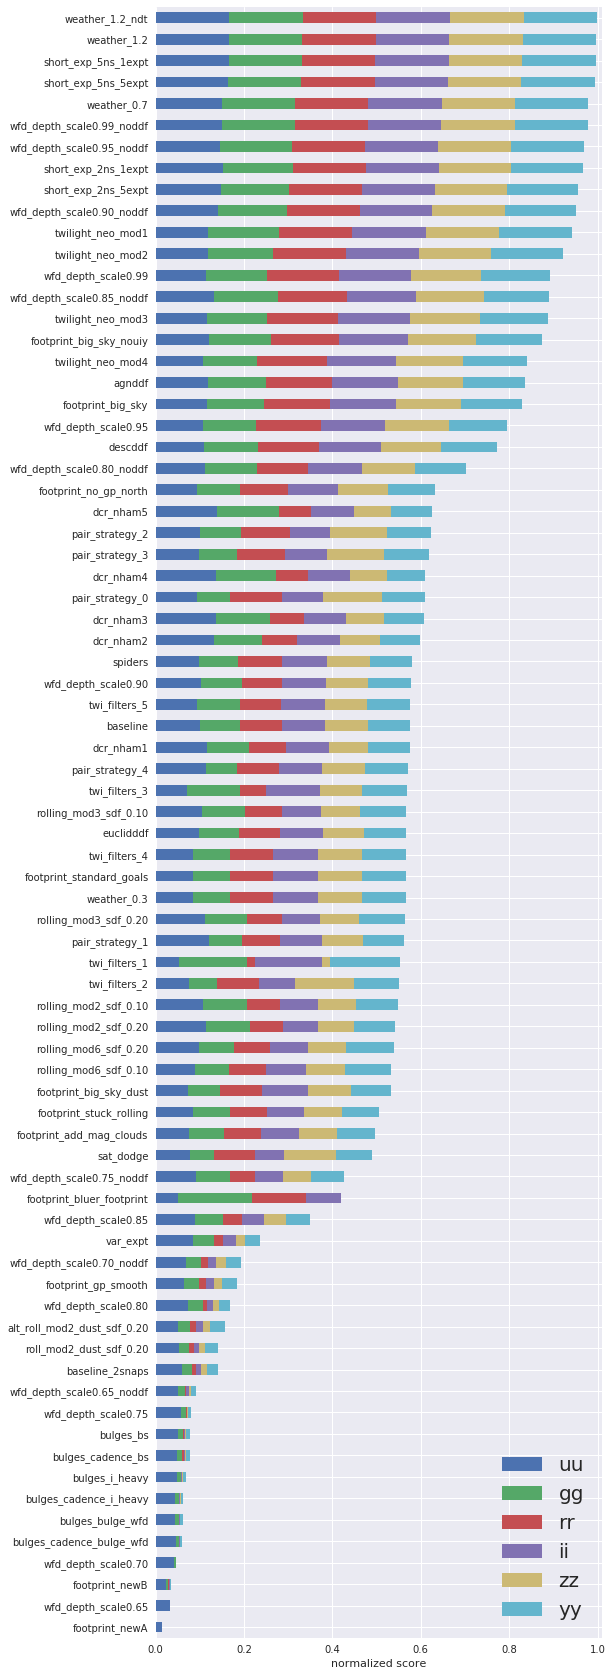

In [79]:
# number of field same filter
colon = cols_same

colon_ = ['{}_field'.format(i) for i in colon]

df_ = df_new.copy()
df_['total'] = np.sum(df_[ colon_ ], axis=1)
df_ = df_.sort_values(by='total', ascending=True)

df_[ colon ] = df_[ colon_ ]/6

renamecol = {'{}_field'.format(i):'{}'.format(i) for i in colon} 
df_ = df_[colon].rename(columns=renamecol)   

df_[ colon ].plot.barh(stacked=True, figsize=(8, 30))
plt.xlabel('normalized score')
plt.ylabel('')
plt.legend(loc='lower right')
plt.xlim([0,1.01])

(0, 1.01)

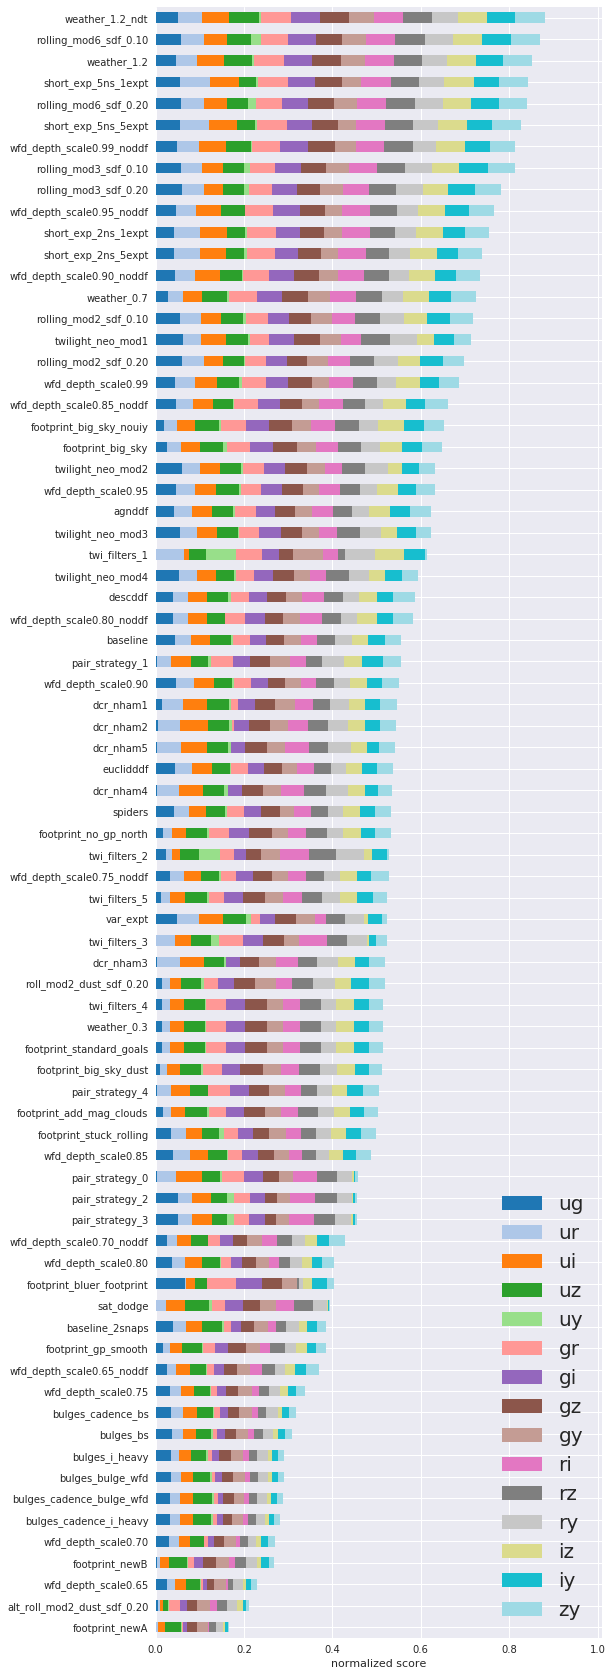

In [80]:
# number of field different filter
colon = cols_diff

colon_ = ['{}_field'.format(i) for i in colon]

df_ = df_new.copy()
df_['total'] = np.sum(df_[ colon_ ], axis=1)
df_ = df_.sort_values(by='total', ascending=True)

df_[ colon ] = df_[ colon_ ]/15

renamecol = {'{}_field'.format(i):'{}'.format(i) for i in colon} 
df_ = df_[colon].rename(columns=renamecol)   

df_[ colon ].plot.barh(stacked=True, figsize=(8, 30), colormap=plt.cm.tab20)
plt.xlabel('normalized score')
plt.ylabel('')
plt.legend(loc='lower right')
plt.xlim([0,1.01])

(0, 1.01)

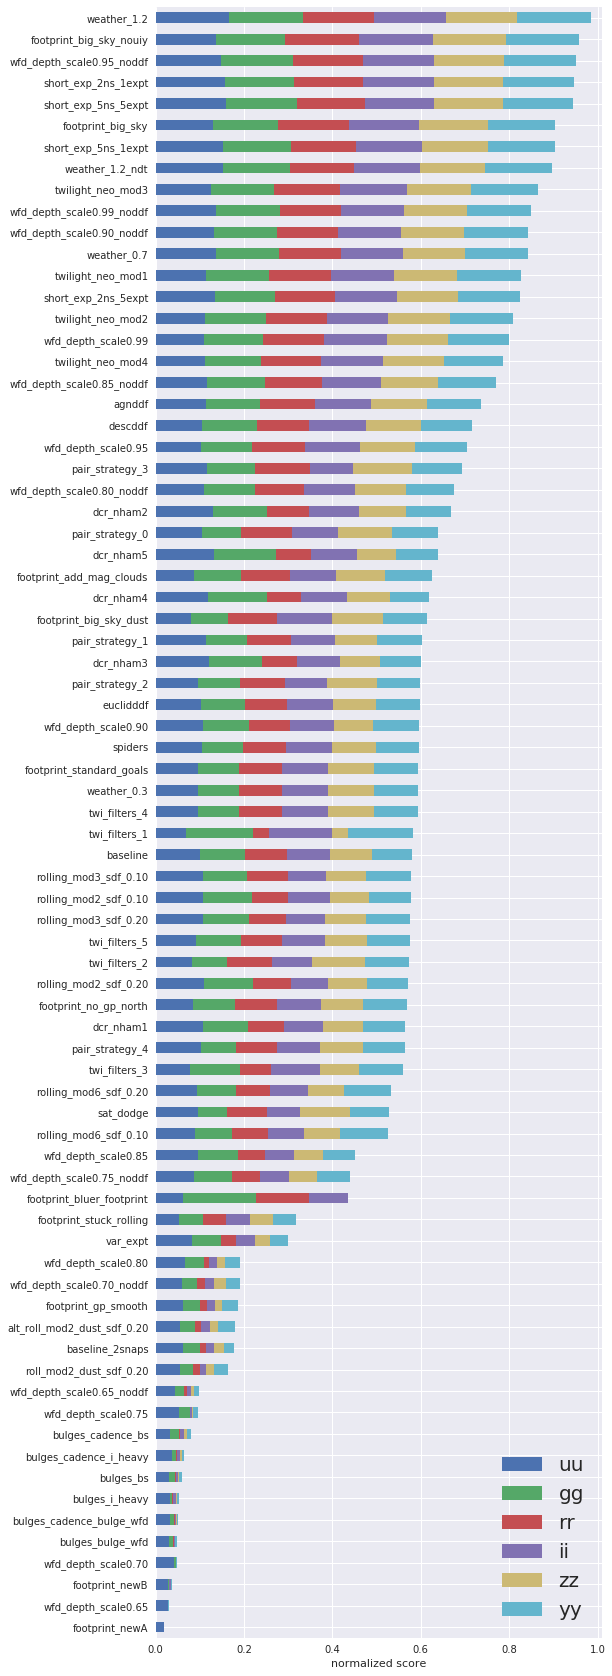

In [85]:
# number of stars same filter
colon = cols_same

colon_ = ['{}_star'.format(i) for i in colon]

df_ = df_new.copy()
df_['total'] = np.sum(df_[ colon_ ], axis=1)
df_ = df_.sort_values(by='total', ascending=True)

df_[ colon ] = df_[ colon_ ]/6

renamecol = {'{}_star'.format(i):'{}'.format(i) for i in colon} 
df_ = df_[colon].rename(columns=renamecol)   

df_[ colon ].plot.barh(stacked=True, figsize=(8, 30))
plt.xlabel('normalized score')
plt.ylabel('')
plt.legend(loc='lower right')
plt.xlim([0,1.01])

(0, 1.01)

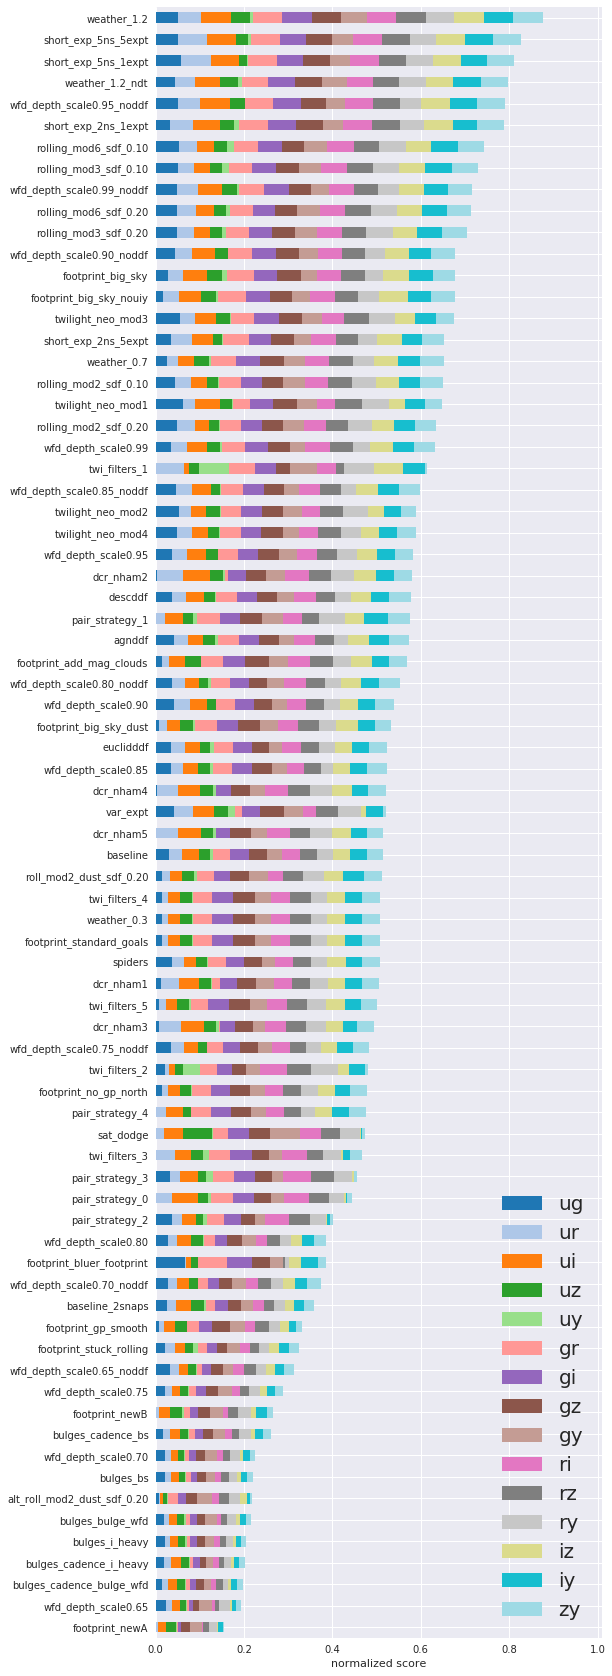

In [83]:
# number of stars different filter
colon = cols_diff

colon_ = ['{}_star'.format(i) for i in colon]

df_ = df_new.copy()
df_['total'] = np.sum(df_[ colon_ ], axis=1)
df_ = df_.sort_values(by='total', ascending=True)

df_[ colon ] = df_[ colon_ ]/15

renamecol = {'{}_star'.format(i):'{}'.format(i) for i in colon} 
df_ = df_[colon].rename(columns=renamecol)   

df_[ colon ].plot.barh(stacked=True, figsize=(8, 30), colormap=plt.cm.tab20)
plt.xlabel('normalized score')
plt.ylabel('')
plt.legend(loc='lower right')
plt.xlim([0,1.01])


```python
df_['same filter'] = scale( np.sum(df_[cols_same], axis=1))/2 
df_['different filters'] = scale( np.sum(df_[cols_diff], axis=1) ) /2
df_['total'] = np.sum(df_[['same filter', 'different filters']], axis=1)
```

```python
df_ = df_.sort_values(by='total', ascending=True)
df_[['same filter', 'different filters']].plot.barh(stacked=True, figsize=(8,30))
plt.xlabel('normalized score for discovery of unknown unknowns')
plt.ylabel('')
plt.xlim([0, 1.025])
```